In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib import animation
from IPython.display import HTML, Image


%matplotlib inline
plt.style.use('seaborn-white')

/var/folders/mr/786zqjwj0rxbd5p5l535_z840000gn/T/ipykernel_72460/737234204.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
def costfunction(X,y,theta):
    #Initialisation of useful values
    m = np.size(y)

    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));
    return J;


def coordinate_descent(theta,X,y,alpha = .03, =20):
    '''Coordinate gradient descent for linear renum_itersgression'''
    #Initialisation of useful values
    m,n = X.shape
    J_history = []
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards


    for i in range(num_iters):

        for j in range(n):
            #Coordinate descent in vectorized form
            h = X @ theta
            gradient =  (X[:,j] @ (h-y))
            theta[j] = theta[j] - alpha * gradient

            #Saving values for plots
            J_history.append(costfunction(X,y,theta))
            theta_0_hist.append(theta[0,0])
            theta_1_hist.append(theta[1,0])

    return theta ,J_history, theta_0_hist, theta_1_hist

def coordinate_descent_norm(theta,X,y,alpha = .03, num_iters=100):
    '''Coordinate gradient descent for linear regression - for normalized data'''
    #Initialisation of useful values
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X
    J_history = []
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards


    for i in range(num_iters):

        for j in range(n):
            #Coordinate descent in vectorized form
            h = (X[:,0:j] @ theta[0:j]) + (X[:,j+1:] @ theta[j+1:])
            theta[j] =  (X[:,j] @ (y - h))

            #Saving values for plots
            J_history.append(costfunction(X,y,theta))
            theta_0_hist.append(theta[0,0])
            theta_1_hist.append(theta[1,0])

    return theta ,J_history, theta_0_hist, theta_1_hist

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


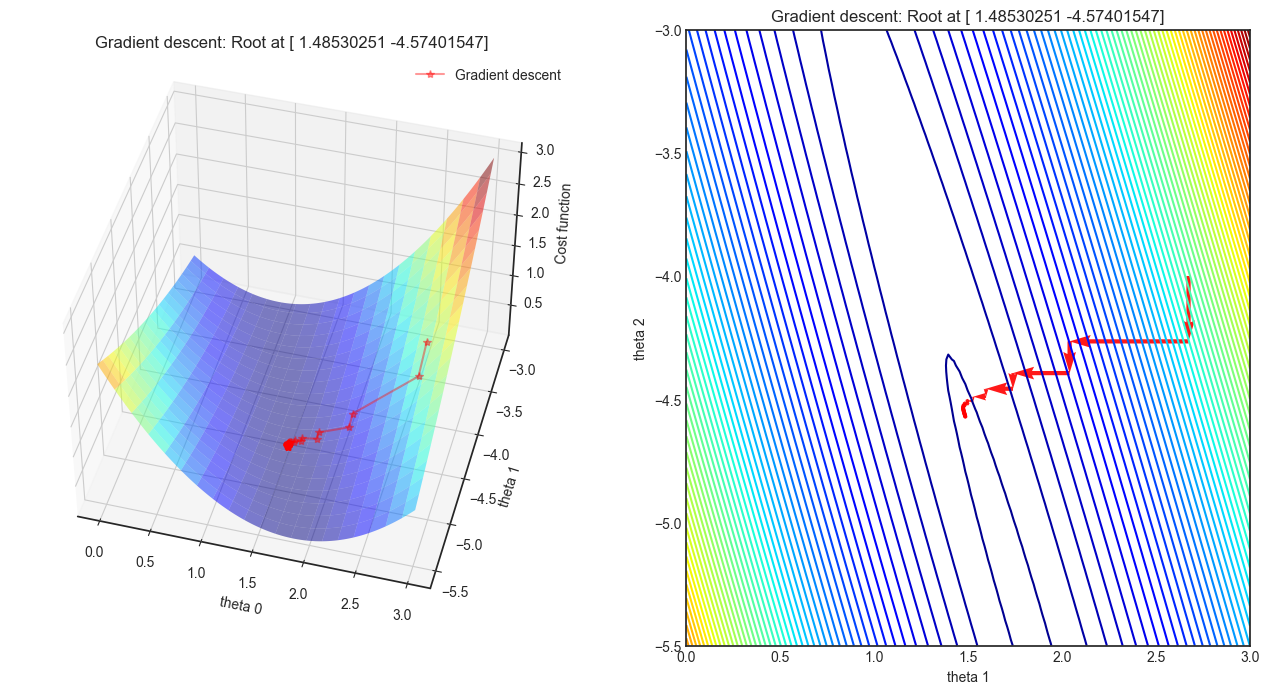

In [3]:
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi )
y_noise = (y + noise).reshape(-1,1)
y_noise = y_noise - y_noise.mean()
X = np.vstack((2*x,x**2)).T
initial_theta = np.array([4,-4.]).reshape(-1,1)

#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(0,3,100),np.linspace(-5.5,-3,100))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1))
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values
Z = zs.reshape(T0.shape)


#Computing the gradient descent
theta_result_c,J_history_c, theta_0_c, theta_1_c = coordinate_descent(initial_theta,X,y_noise, alpha = .009)

#Angles needed for quiver plot
anglesx = np.array(theta_0_c)[1:] - np.array(theta_0_c)[:-1]
anglesy = np.array(theta_1_c)[1:] - np.array(theta_1_c)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0_c,theta_1_c,J_history_c, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(theta_result_c.ravel()))
ax.view_init(45, -75)
ax.legend()


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0_c[:-1], theta_1_c[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('Gradient descent: Root at {}'.format(theta_result_c.ravel()))
ax.legend()

plt.legend()
plt.show()

In [8]:
np.array([1,2]).T@np.array([1,3 ])

7